## Basic validation of BLANC measurement

In [1]:
%pip install blanc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 695.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu121
    Uninstalling torch-2.1.0+cu121:
      Successfully uninstalled torch-2.1.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 1.13.1

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
from blanc import BlancHelp, BlancTune

document = "Jack drove his minivan to the bazaar to purchase milk and honey for his large family."
summary = "Jack bought milk and honey."

blanc_help = BlancHelp(device='cuda', inference_batch_size=128)
blanc_tune = BlancTune(device='cuda', inference_batch_size=24, finetune_mask_evenly=False, finetune_batch_size=24)

print(blanc_help.eval_once(document, summary))
print(blanc_tune.eval_once(document, summary))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model t

0.2222222222222222


100%|██████████| 1/1 [00:00<00:00, 57.00it/s]
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead,

0.2222222222222222


## Experiment 1: random words summaries

In [4]:
import json
import numpy as np

# Load text-generated summary data in Google drive
documents = []
summaries = []
human_scores = []
CNN_DailyMail_555 = "/content/drive/MyDrive/Colab Notebooks/M2-IASD/Large Language Model/Project/data/CNN_DailyMail_555.json"

with open(CNN_DailyMail_555, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Iterate over the JSON data and store the text and generated summaries in the respective lists
for item in data:
    documents.append(item['text'])
    summaries.append(item['summary'])
    human_scores.append(np.mean(item['scores'])/5)

print(len(documents))
print(len(summaries))
print(len(human_scores))

555
555
555


In [62]:
import random
from nltk.tokenize import word_tokenize

random.seed(1)

def generate_random_words_summary(text, summary_length):
    words = word_tokenize(text)
    return ' '.join(random.choices(words, k=summary_length))

# Generate randomized word summaries
random_words_summaries = []

for doc, summary in zip(documents, summaries):
    summary_length = len(word_tokenize(summary))
    random_words_summary = generate_random_words_summary(doc, summary_length)
    random_words_summaries.append(random_words_summary)

print(len(word_tokenize(summaries[7])))
print(len(word_tokenize(random_words_summaries[7])))

29
29


In [63]:
# Compare the scores of original summaries and random words sumaries with blanc_help
blanc_help = BlancHelp(device='cuda', inference_batch_size=128)

original_score = blanc_help.eval_pairs(documents, summaries)
random_words_score = blanc_help.eval_pairs(documents, random_words_summaries)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'bert.pooler.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 535/535 [15:14<00:00,  1.71s/it]


In [64]:

print("BLANC-help score for original summaries:", np.mean(original_score))
print("BLANC-help score for random words summaries:", np.mean(random_words_score))



BLANC-help score for original summaries: 0.12566519991690078
BLANC-help score for random words summaries: 0.008102222778980922


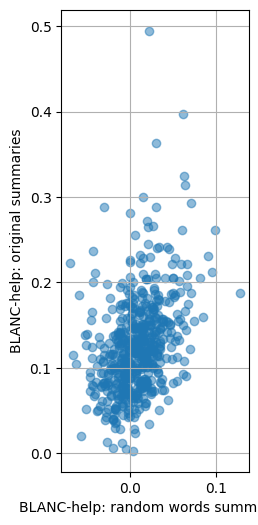

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(random_words_score, original_score, alpha = 0.5)

plt.xlabel('BLANC-help: random words summaries')
plt.ylabel('BLANC-help: original summaries')

plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

In [66]:
"""
# Compare the scores of original summaries and random words sumaries with blanc_tune
blanc_tune = BlancTune(device='cuda', inference_batch_size=24, finetune_mask_evenly=False, finetune_batch_size=24)

original_score = blanc_tune.eval_pairs(documents[:50], summaries[:50])
random_words_score = blanc_tune.eval_pairs(documents[:50], random_words_summaries[:50])
"""


"\n# Compare the scores of original summaries and random words sumaries with blanc_tune\nblanc_tune = BlancTune(device='cuda', inference_batch_size=24, finetune_mask_evenly=False, finetune_batch_size=24)\n\noriginal_score = blanc_tune.eval_pairs(documents[:50], summaries[:50])\nrandom_words_score = blanc_tune.eval_pairs(documents[:50], random_words_summaries[:50])\n"

In [67]:
"""
print("BLANC-tune score for original summaries:", np.mean(original_score))
print("BLANC-tune score for random words summaries:", np.mean(random_words_score))
"""

'\nprint("BLANC-tune score for original summaries:", np.mean(original_score))\nprint("BLANC-tune score for random words summaries:", np.mean(random_words_score))\n'

## Experiment 2: BLANC-help for 3-sentence summaries with one or more sentences replaced by random words from the text.

In [68]:
from nltk.tokenize import sent_tokenize

# Filter summaries with exactly three sentences
three_sentences_documents = []
three_sentences_summaries = []
three_sentences_human_scores = []


for item in data:
    if len(sent_tokenize(item['summary'])) == 3:
        three_sentences_documents.append(item['text'])
        three_sentences_summaries.append(item['summary'])
        three_sentences_human_scores.append(np.mean(item['scores'])/5)

print(len(three_sentences_documents))
print(len(three_sentences_summaries))
print(len(three_sentences_human_scores))

126
126
126


In [69]:
# Function to replace sentences with random words
def replace_with_random_words(summary, num_sentences_to_replace):
    sentences = sent_tokenize(summary)
    for i in range(num_sentences_to_replace):
        random_words = ' '.join(random.choices(word_tokenize(sentences[i]), k=len(word_tokenize(sentences[i]))))
        sentences[i] = random_words
    return ' '.join(sentences)

# Create these random words summaries
summaries_one_sentence_randomized = []
summaries_two_sentences_randomized = []
summaries_three_sentences_randomized = []

for i in range(len(three_sentences_documents)):
    summaries_one_sentence_randomized.append(replace_with_random_words(three_sentences_summaries[i], 1))
    summaries_two_sentences_randomized.append(replace_with_random_words(three_sentences_summaries[i], 2))
    summaries_three_sentences_randomized.append(replace_with_random_words(three_sentences_summaries[i], 3))


# Calculate the BLANC-help scores for four situations: 0, 1, 2, 3 sentences randomized
blanc_help = BlancHelp(device='cuda', inference_batch_size=128)

scores_original_summary = blanc_help.eval_pairs(three_sentences_documents, three_sentences_summaries)

scores_one_sentence_randomized = blanc_help.eval_pairs(three_sentences_documents, summaries_one_sentence_randomized)

scores_two_sentences_randomized = blanc_help.eval_pairs(three_sentences_documents, summaries_two_sentences_randomized)

scores_three_sentences_randomized = blanc_help.eval_pairs(three_sentences_documents, summaries_three_sentences_randomized)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'bert.pooler.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 87/87 [02:11<00:00,  1.52s/it]


In [70]:
print("BLANC-help score for original summaries:", np.mean(scores_original_summary))
print("BLANC-help score for one sentence randomized summaries:", np.mean(scores_one_sentence_randomized))
print("BLANC-help score for two sentence randomized summaries:", np.mean(scores_two_sentences_randomized))
print("BLANC-help score for three sentence randomized summaries:", np.mean(scores_three_sentences_randomized))

BLANC-help score for original summaries: 0.11729071954579352
BLANC-help score for one sentence randomized summaries: 0.09477707369935848
BLANC-help score for two sentence randomized summaries: 0.06707220833961212
BLANC-help score for three sentence randomized summaries: 0.022031848394312478


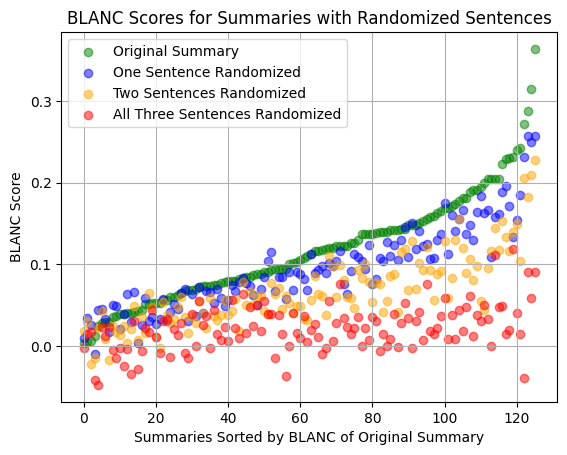

In [71]:

# Create a list of indices
indices = np.arange(len(scores_original_summary))

# Sort the lists based on scores_original_summary
sorted_indices = sorted(indices, key=lambda i: scores_original_summary[i])

# # Sort the summaries based on the scores of the original summary
sorted_scores_original_summary = [scores_original_summary[i] for i in sorted_indices]
sorted_scores_one_sentence_randomized = [scores_one_sentence_randomized[i] for i in sorted_indices]
sorted_scores_two_sentences_randomized = [scores_two_sentences_randomized[i] for i in sorted_indices]
sorted_scores_three_sentences_randomized = [scores_three_sentences_randomized[i] for i in sorted_indices]


# Create scatter plots for each summary type
plt.scatter(indices, sorted_scores_original_summary, alpha=0.5, label='Original Summary', color='green')
plt.scatter(indices, sorted_scores_one_sentence_randomized, alpha=0.5, label='One Sentence Randomized', color='blue')
plt.scatter(indices, sorted_scores_two_sentences_randomized, alpha=0.5, label='Two Sentences Randomized', color='orange')
plt.scatter(indices, sorted_scores_three_sentences_randomized, alpha=0.5, label='All Three Sentences Randomized', color='red')

# Labeling the plot
plt.title('BLANC Scores for Summaries with Randomized Sentences')
plt.xlabel('Summaries Sorted by BLANC of Original Summary')
plt.ylabel('BLANC Score')
plt.legend()
plt.grid(True)
plt.show()


## Experiment 3: random sentences summaries

In [7]:
from nltk.tokenize import sent_tokenize
import random
random.seed(1)


def generate_random_sentence_summary(text, summary, num_sentences):
    sentences = sent_tokenize(text)
    random_sentences = []

    while len(random_sentences) < num_sentences and sentences:
        candidate_sentence = random.choice(sentences)
        random_sentences.append(candidate_sentence)
        # Delete the correspoding sentence in the original text
        sentences.remove(candidate_sentence)

    modified_text = ' '.join(sentences)

    return ' '.join(random_sentences), modified_text

# Example usage:
original_text_ex = "This is a sample text. It contains multiple sentences. We want to generate a random summary from it."
summary_text_ex = "This is a random summary."

random_summary_ex, modified_text_ex = generate_random_sentence_summary(original_text_ex, summary_text_ex, 1)

print("Original text:\n", original_text_ex)
print("\nRandom sentences summary:\n", random_summary_ex)
print("\nModified text:\n", modified_text_ex)

Original text:
 This is a sample text. It contains multiple sentences. We want to generate a random summary from it.

Random sentences summary:
 This is a sample text.

Modified text:
 It contains multiple sentences. We want to generate a random summary from it.


In [8]:
# Generate randomized sentences summaries
random_sentences_summaries = []
modified_documents = []

for doc, summary in zip(documents, summaries):
    num_sentences = len(sent_tokenize(summary))
    random_sentences_summary, modified_text = generate_random_sentence_summary(doc, summary, num_sentences)
    modified_documents.append(modified_text)
    random_sentences_summaries.append(random_sentences_summary)

print(len(sent_tokenize(summaries[10])))
print(len(sent_tokenize(random_sentences_summaries[10])))

6
6


In [9]:
# Compare the scores of original summaries and random sentences sumaries with blanc_help
blanc_help = BlancHelp(device='cuda', inference_batch_size=128)

original_score = blanc_help.eval_pairs(modified_documents, summaries)
random_sentences_score = blanc_help.eval_pairs(modified_documents, random_sentences_summaries)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 459/459 [20:20<00:00,  2.66s/it]


In [10]:
print("BLANC-help score for original summaries:", np.mean(original_score))
print("BLANC-help score for random sentences summaries:", np.mean(random_sentences_score))


BLANC-help score for original summaries: 0.12644161558297384
BLANC-help score for random sentences summaries: 0.08987041171085026


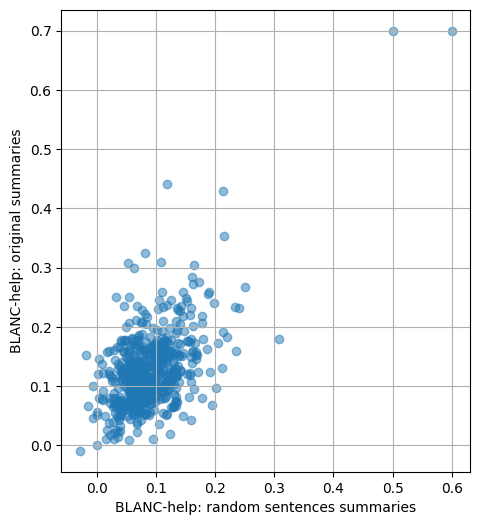

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(random_sentences_score, original_score, alpha = 0.5)

plt.xlabel('BLANC-help: random sentences summaries')
plt.ylabel('BLANC-help: original summaries')

plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()


In [14]:
"""
# Compare the scores of original summaries and random sentences sumaries with blanc_tune
blanc_tune = BlancTune(device='cuda', inference_batch_size=24, finetune_mask_evenly=False, finetune_batch_size=24)

original_score = blanc_tune.eval_pairs(modified_documents[175:225], summaries[175:225])
random_words_score = blanc_tune.eval_pairs(modified_documents[175:225], random_sentences_summaries[175:225])
"""


"\n# Compare the scores of original summaries and random sentences sumaries with blanc_tune\nblanc_tune = BlancTune(device='cuda', inference_batch_size=24, finetune_mask_evenly=False, finetune_batch_size=24)\n\noriginal_score = blanc_tune.eval_pairs(modified_documents[175:225], summaries[175:225])\nrandom_words_score = blanc_tune.eval_pairs(modified_documents[175:225], random_sentences_summaries[175:225])\n"

In [15]:
"""
print("BLANC-tune score for original summaries:", np.mean(original_score))
print("BLANC-tune score for random sentences summaries:", np.mean(random_sentences_score))
"""

'\nprint("BLANC-tune score for original summaries:", np.mean(original_score))\nprint("BLANC-tune score for random sentences summaries:", np.mean(random_sentences_score))\n'

## Experiment 4: Comparison of BLANC score and human score

In [16]:

blanc_help = BlancHelp(device='cuda', inference_batch_size=128)

blanc_score = blanc_help.eval_pairs(documents[150:200], summaries[150:200])
human_score = human_scores[150:200]


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 49/49 [01:10<00:00,  1.44s/it]


In [17]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficients between BLANC-help scores and human scores
correlation, _ = pearsonr(blanc_score, human_score)
print('Pearson correlation:', correlation)

Pearson correlation: 0.3730517831960919


In [18]:
blanc_tune = BlancTune(device='cuda', inference_batch_size=24, finetune_mask_evenly=False, finetune_batch_size=24)

blanc_score = blanc_tune.eval_pairs(documents[150:200], summaries[150:200])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 129/129 [00:16<00:00,  7.63it/s]
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializin

In [19]:
# Calculate Pearson correlation coefficients between BLANC-tune scores and human scores
correlation, _ = pearsonr(blanc_score, human_score)
print('Pearson correlation:', correlation)

Pearson correlation: 0.3519732250316079
